<a href="https://colab.research.google.com/github/Hritikrai55/retail-analytics-for-store-optimization/blob/main/Retail_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Integrated Retail Analytics for Store Optimization and Demand Forecasting**
Dataset:

1. Feature Dataset
2. Sales Dataset
3. Stores Dataset

## **Project Objective:**
  - To utilize machine learning and data analysis techniques to optimize store performance, forecast demand, and enhance customer experience through segmentation and personalized marketing strategies.

## **Project Components:**

### **Anomaly Detection in Sales Data:**
* Identify unusual sales patterns across stores and departments.
* Investigate potential causes (e.g., holidays, markdowns, economic indicators).
* Implement anomaly handling strategies to clean the data for further analysis.

### **Time-Based Anomaly Detection:**
* Analyze sales trends over time.
* Detect seasonal variations and holiday effects on sales.
* Use time-series analysis for understanding store and department performance over time.

### **Data Preprocessing and Feature Engineering:**
* Handle missing values, especially in the MarkDown data.
* Create new features that could influence sales (e.g., store size/type, regional factors).

### **Customer Segmentation Analysis:**
* Segment stores or departments based on sales patterns, markdowns, and regional features.
* Analyze segment-specific trends and characteristics.

### **Market Basket Analysis:**
* Although individual customer transaction data is not available, infer potential product associations within departments using sales data.
* Develop cross-selling strategies based on these inferences.

### **Demand Forecasting:**
* Build models to forecast weekly sales for each store and department.
* Incorporate factors like CPI, unemployment rate, fuel prices, and store/dept attributes.
* Explore short-term and long-term forecasting models.

### **Impact of External Factors:**
* Examine how external factors (economic indicators, regional climate) influence sales.
* Incorporate these insights into the demand forecasting models.

### **Personalization Strategies:**
* Develop personalized marketing strategies based on the markdowns and store segments.
* Propose inventory management strategies tailored to store and department needs.

### **Segmentation Quality Evaluation:**
* Evaluate the effectiveness of the customer segmentation.
* Use metrics to assess the quality of segments in terms of homogeneity and separation.

### **Real-World Application and Strategy Formulation:**
* Formulate a comprehensive strategy for inventory management, marketing, and store optimization based on the insights gathered.
* Discuss potential real-world challenges in implementing these strategies.

## **About Dataset**

**Content**
* You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.
* **Markdown:** *Markdown is a deliberate reduction in the original selling price of a product. Retailers use markdowns to clear out old or slow-moving inventory, make room for new products, and recoup some of the costs associated with carrying unsold merchandise.*

Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales

**Stores**
* Anonymized information about the 45 stores, indicating the type and size of store

**Features**
* Contains additional data related to the store, department, and regional activity for the given dates.
* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week

**Sales**
* Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:
* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales -  sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week

### **Task:**
- Predict the department-wise sales for each store for the following year
- Model the effects of markdowns on holiday weeks
- Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

#**Importing Libraries and Data Ingestion**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
feature_df=pd.read_csv("Features data set.csv")
sales_df=pd.read_csv("sales data-set.csv")
store_df=pd.read_csv("stores data-set.csv")

In [3]:
feature_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
feature_df.shape,sales_df.shape,store_df.shape

((8190, 12), (421570, 5), (45, 3))

In [7]:
# Display the info for each DataFrame in a systematic way
print("Feature DataFrame Information:")
print(feature_df.nunique())
print("\n" + "-"*50 + "\n")

print("Sales DataFrame Information:")
print(sales_df.nunique())
print("\n" + "-"*50 + "\n")

print("Store DataFrame Information:")
print(store_df.nunique())

Feature DataFrame Information:
Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

--------------------------------------------------

Sales DataFrame Information:
Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

--------------------------------------------------

Store DataFrame Information:
Store    45
Type      3
Size     40
dtype: int64


# **Exploratory Data Analysis**

In [8]:
# change date format
feature_df['Date'] = pd.to_datetime(feature_df['Date'], format = 'mixed')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format = 'mixed')

In [9]:
# Merge different datasets
df = pd.merge(sales_df, feature_df, how = 'left', on = ['Store','Date','IsHoliday']) # merging sales and features by left since there are more rows for sales
df_new = pd.merge(df, store_df, how = 'left', on = 'Store') #merge df and df_stores by left to keep all the columns and rows

# Filling all NA values with 0
df_new = df_new.fillna(0)

In [10]:
df_new.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315
5,1,1,2010-12-03,21043.39,False,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,A,151315
8,1,1,2010-02-04,57258.43,False,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,A,151315
9,1,1,2010-09-04,42960.91,False,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,A,151315


In [11]:
# Dataset information
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [12]:
# Checking the number of unique values for each column in the dataset
df_new.nunique()

,0
Store,45
Dept,81
Date,143
Weekly_Sales,359464
IsHoliday,2
Temperature,3528
Fuel_Price,892
MarkDown1,2278
MarkDown2,1499
MarkDown3,1662


In [13]:
#seperate Numerical and Categorical Variables
cat_cols =['Store', 'Dept', 'IsHoliday', 'Type']
num_cols = df_new.columns.drop(cat_cols)
num_cols = num_cols.drop('Date') # Drop 'Date' column from numerical columns

print('Categorical Variables:')
print(cat_cols)

print('Numerical Variables:')
print(num_cols)

Categorical Variables:
['Store', 'Dept', 'IsHoliday', 'Type']
Numerical Variables:
Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size'],
      dtype='object')


## **Graphical insights**

1. Across time: Weekly sales across time, (per month and per year), Unemployment across time, CPI across time, Fuel_Price across time, Temperature Across time
2. Across outlets: Weekly sales per store, type, department

Factors that affects sales
* Acceptable skewness ranges from -3 to +3, Markdowns are all highly skewed; left-skewed as Markdowns do not occur often

## **1.1: Graphical insights across time**


#### Qns: 1. What is the trend in weekly sales across time - per year, per month

<function matplotlib.pyplot.show(close=None, block=None)>

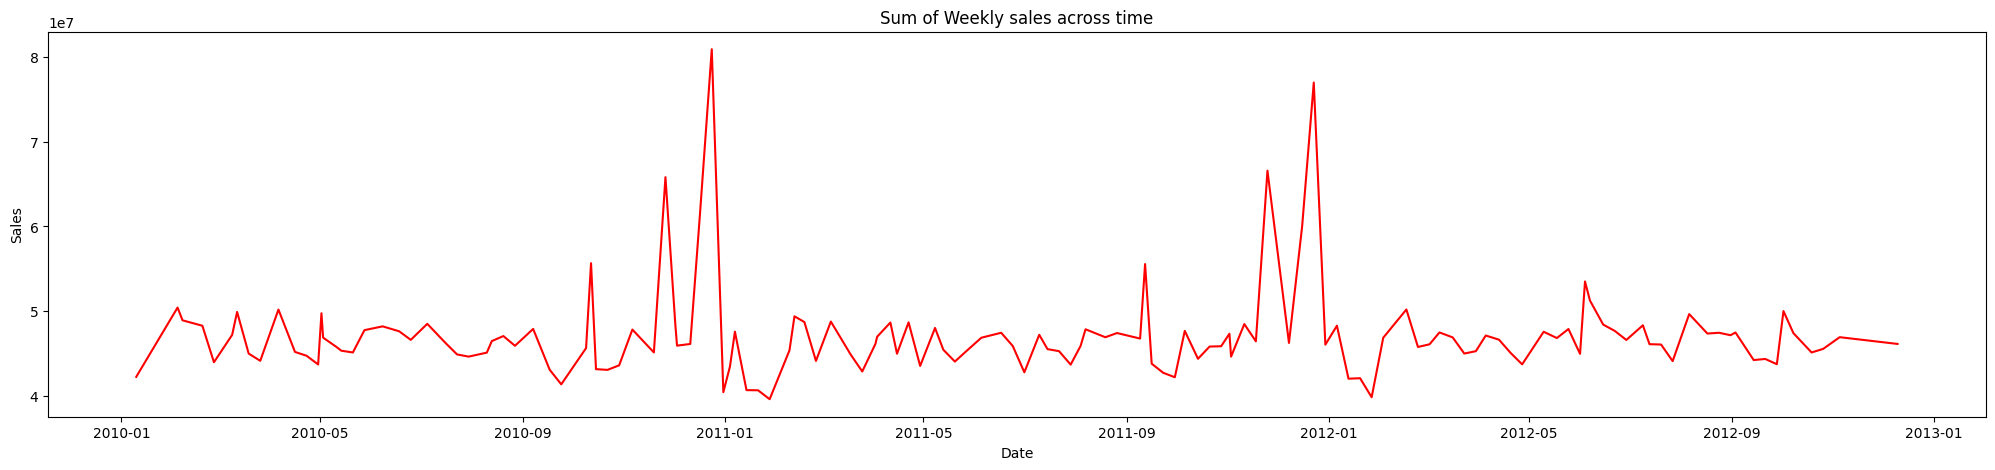

In [14]:
# Sum of sales  across time
sales_across_time = df_new.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()

plt.figure(figsize = (25,5))
plt.plot(sales_across_time.Date, sales_across_time.Weekly_Sales,color="r")
plt.title("Sum of Weekly sales across time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show

# Sales are generally constant, except on certain months (Nov, Dec)

/tmp/ipython-input-15-39989703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette = 'rocket')


Text(0.5, 0, 'Years')

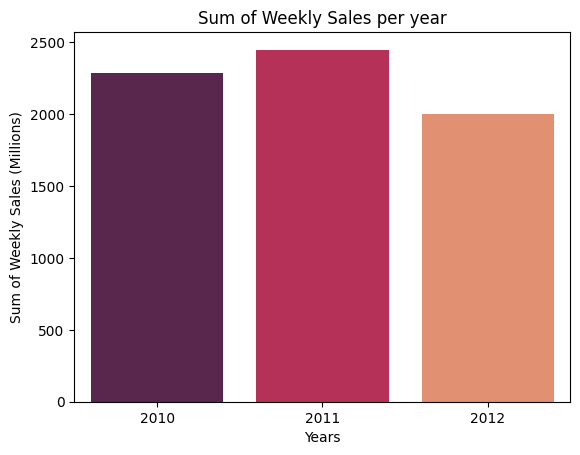

In [15]:
yearly_sales = df_new.groupby(df_new.Date.dt.year)['Weekly_Sales'].sum()/1000000
sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette = 'rocket')
plt.title("Sum of Weekly Sales per year")
plt.ylabel("Sum of Weekly Sales (Millions)")
plt.xlabel("Years")

# Sum of Weekly sales is the highest in 2011 -- look into factors that may affect the sales

/tmp/ipython-input-16-354207613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_sales.index, y = monthly_sales.values, palette='flare')


Text(0.5, 1.0, 'Sum of weekly sales per month')

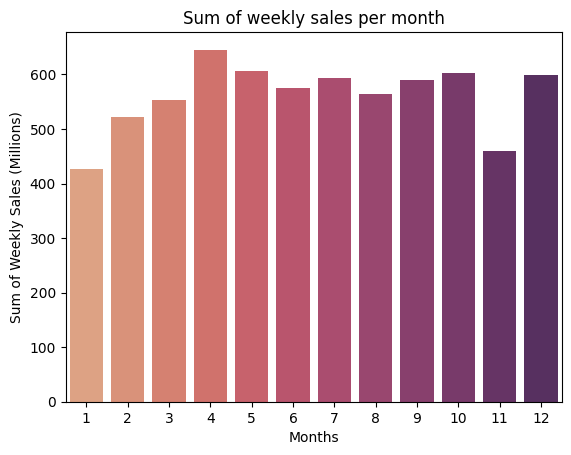

In [16]:
# Sum of weekly sales each month, across the years
monthly_sales = df_new.groupby(df_new.Date.dt.month)['Weekly_Sales'].sum()/1000000
sns.barplot(x = monthly_sales.index, y = monthly_sales.values, palette='flare')
plt.xlabel('Months')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title("Sum of weekly sales per month")

# Sum of weekly sales is the highest in April, followed by October

* Sales experience a noticeable boost during special promotions and holidays (like Black Friday, Christmas, and New Year), but this is often followed by a drop. Afterward, sales pick up again in certain months.

* November shows a dip in purchasing activity, likely because customers are waiting for upcoming sales.

* The data for December 2013 seems to be incomplete; although there was a surge, overall sales didn't reach significant levels due to the limited data available.

## Sales Trends by Time:

Weekly sales surge by approximately 20% during November and December due to holiday promotions. Sales decline by approximately 15% in January post-holiday season.

In [17]:
# Further deepdive into specific dates that drives highest weekly sales
# Top 5 dates where weekly_sales are the highest
sales_across_time = df_new.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()
sort_sales_across_time = sales_across_time.sort_values('Weekly_Sales', ascending = False) # sort in descending order
sort_sales_across_time.head(5)

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


#### Qns 2. What is the trend in average unemployment rate across time


<function matplotlib.pyplot.show(close=None, block=None)>

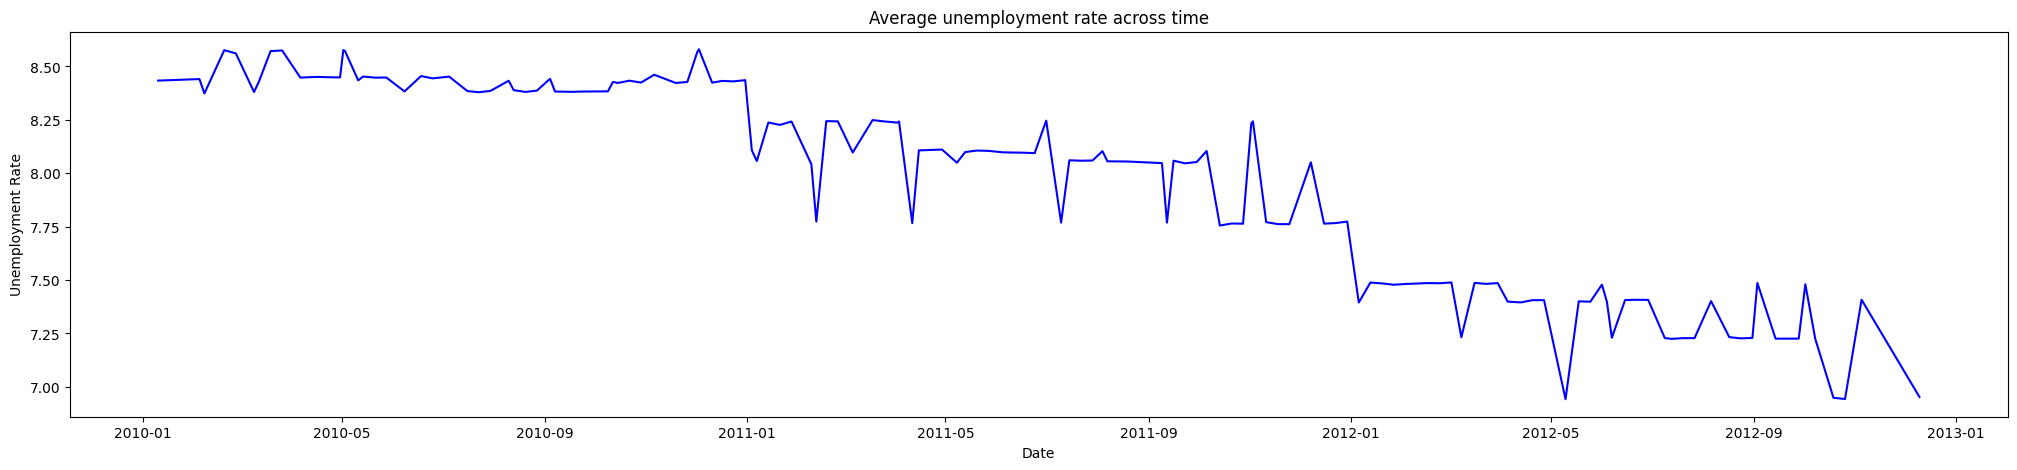

In [18]:
# Unemployment across time
unn_across_time = df_new.groupby(by = ['Date'], as_index= False)['Unemployment'].mean() # average rate of unemployment each date for all the different outlets
plt.figure(figsize = (25,5))
plt.plot(unn_across_time.Date, unn_across_time.Unemployment,color="b")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Average unemployment rate across time")
plt.show

**Findings:-**
* January 2010 to December 2012: Gradual decrease in the unemployment rate.This result in improving the purchasing power of the customer.

#### Qns 3. What is the trend in average CPI across time
- Analyse the change in prices paid for a basket of consumer goods and services. Serves as an indicator of inflation rate
- **Consumer price index - measure of the average change overtime in the prices paid for a basket of consumer goods and services Higher CPI indicates a higher inflation**

Text(0.5, 1.0, 'Average CPI across time')

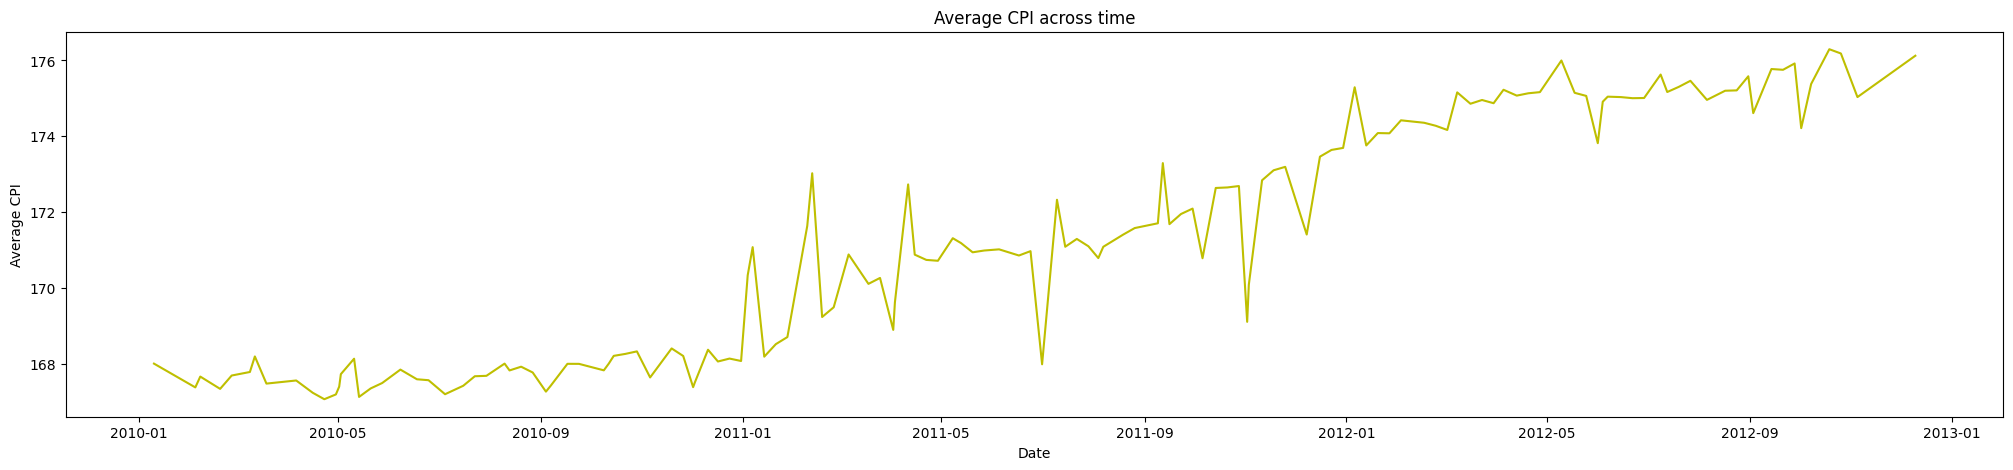

In [19]:
# CPI across time
cpi_across_time = df_new.groupby(by = ['Date'], as_index= False)['CPI'].mean()
plt.figure(figsize = (25,5))
plt.plot(cpi_across_time.Date, cpi_across_time.CPI, color="y")
plt.xlabel('Date')
plt.ylabel("Average CPI")
plt.title("Average CPI across time")
# CPI generally increases across the years

Findings:
* January 2010 to December 2012: We have noted a gradual increase in the consumer price index from due to inflation.

#### Qns 4. What is the trend in average Fuel price, Temperature across time

Text(0.5, 1.0, 'Average Fuel Price across time')

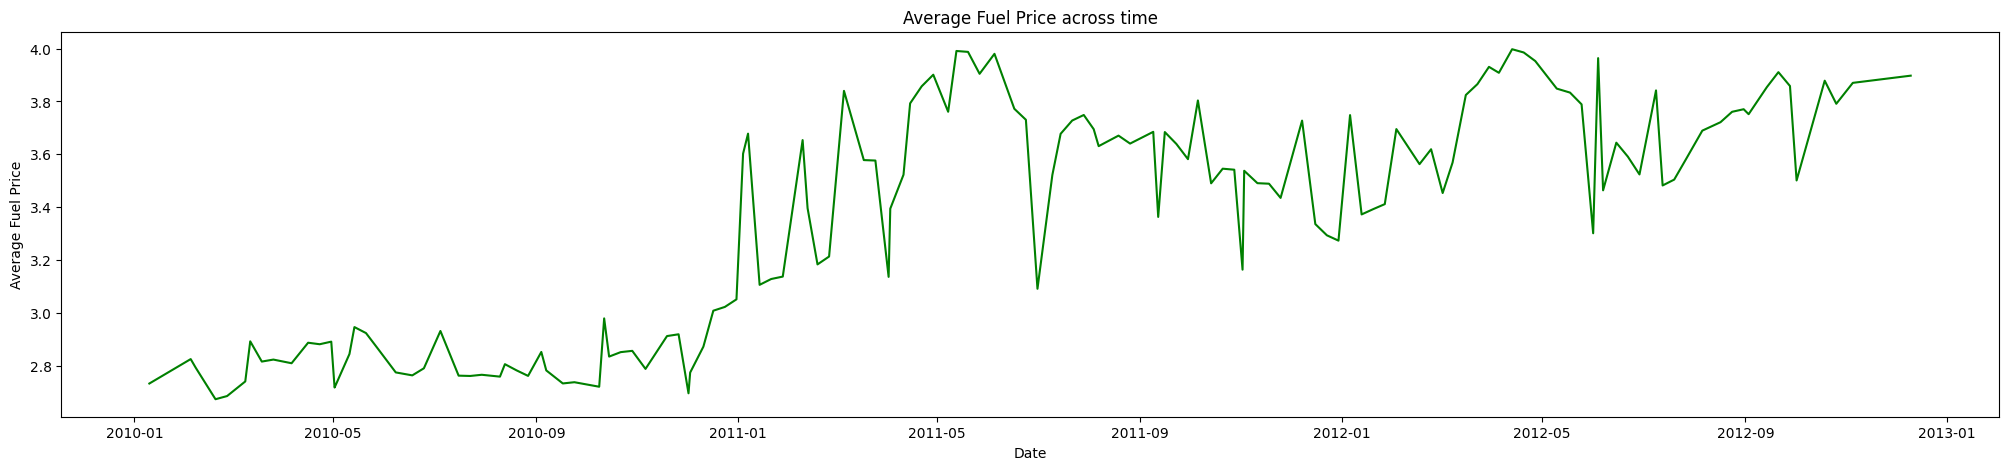

In [20]:
# Average fuel price across time
fuel_across_time = df_new.groupby(by = ['Date'], as_index= False)['Fuel_Price'].mean()
plt.figure(figsize=(25,5))
plt.plot(fuel_across_time.Date, fuel_across_time.Fuel_Price, color="g")
plt.xlabel('Date')
plt.ylabel('Average Fuel Price')
plt.title("Average Fuel Price across time")
# Average fuel price is generally increasing across the years

Findings:-

* January 2010 to December 2010: Stable fuel price rate with no significant changes.  
* January 2011 to December 2012: Gradual increase in fuel prices attributed to inflationary factors.

Text(0.5, 1.0, 'Average Temperature across time')

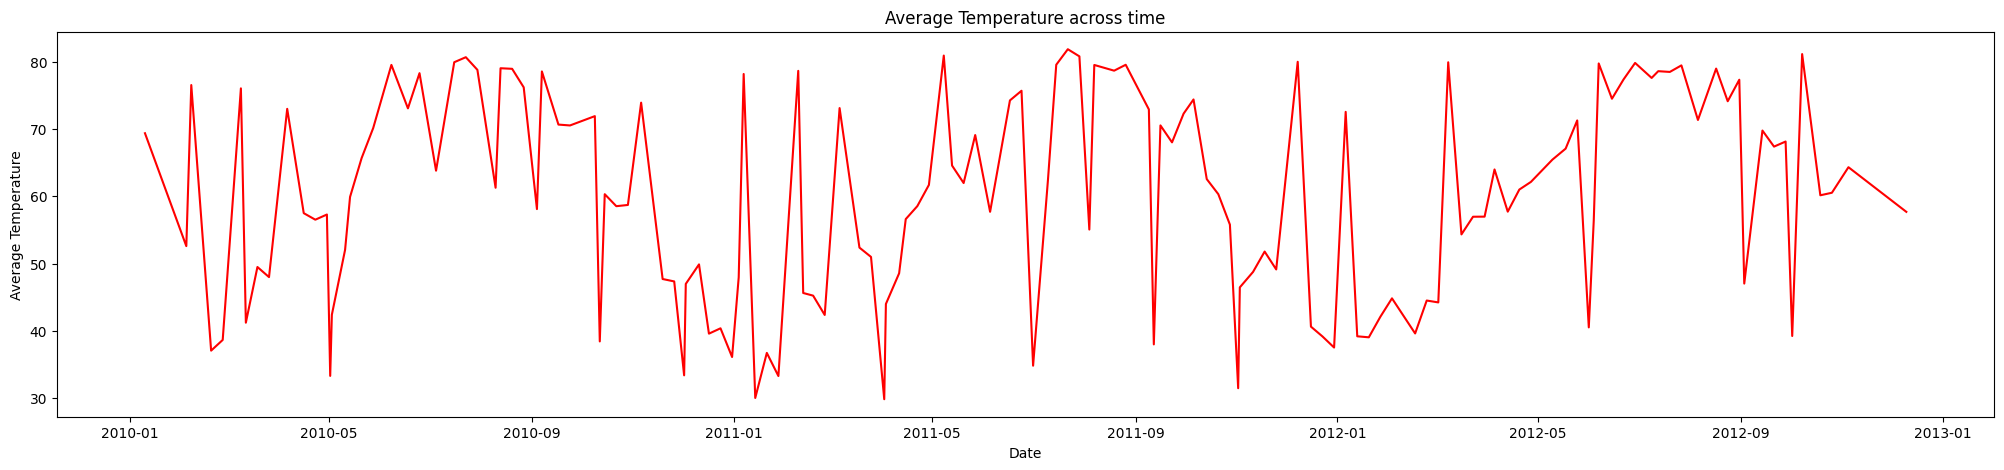

In [21]:
# Temperature  across time
temp_across_time = df_new.groupby(by = ['Date'], as_index= False)['Temperature'].mean()
plt.figure(figsize=(25,5))
plt.plot(temp_across_time.Date, temp_across_time.Temperature, color="r")
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title("Average Temperature across time")
# Average fuel price is generally increasing across the years

#### Qns 5. Which stores have the highest earners?

/tmp/ipython-input-22-3002647359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = stores_sales.Store, y = stores_sales.Weekly_Sales , data = stores_sales, palette = 'rocket')


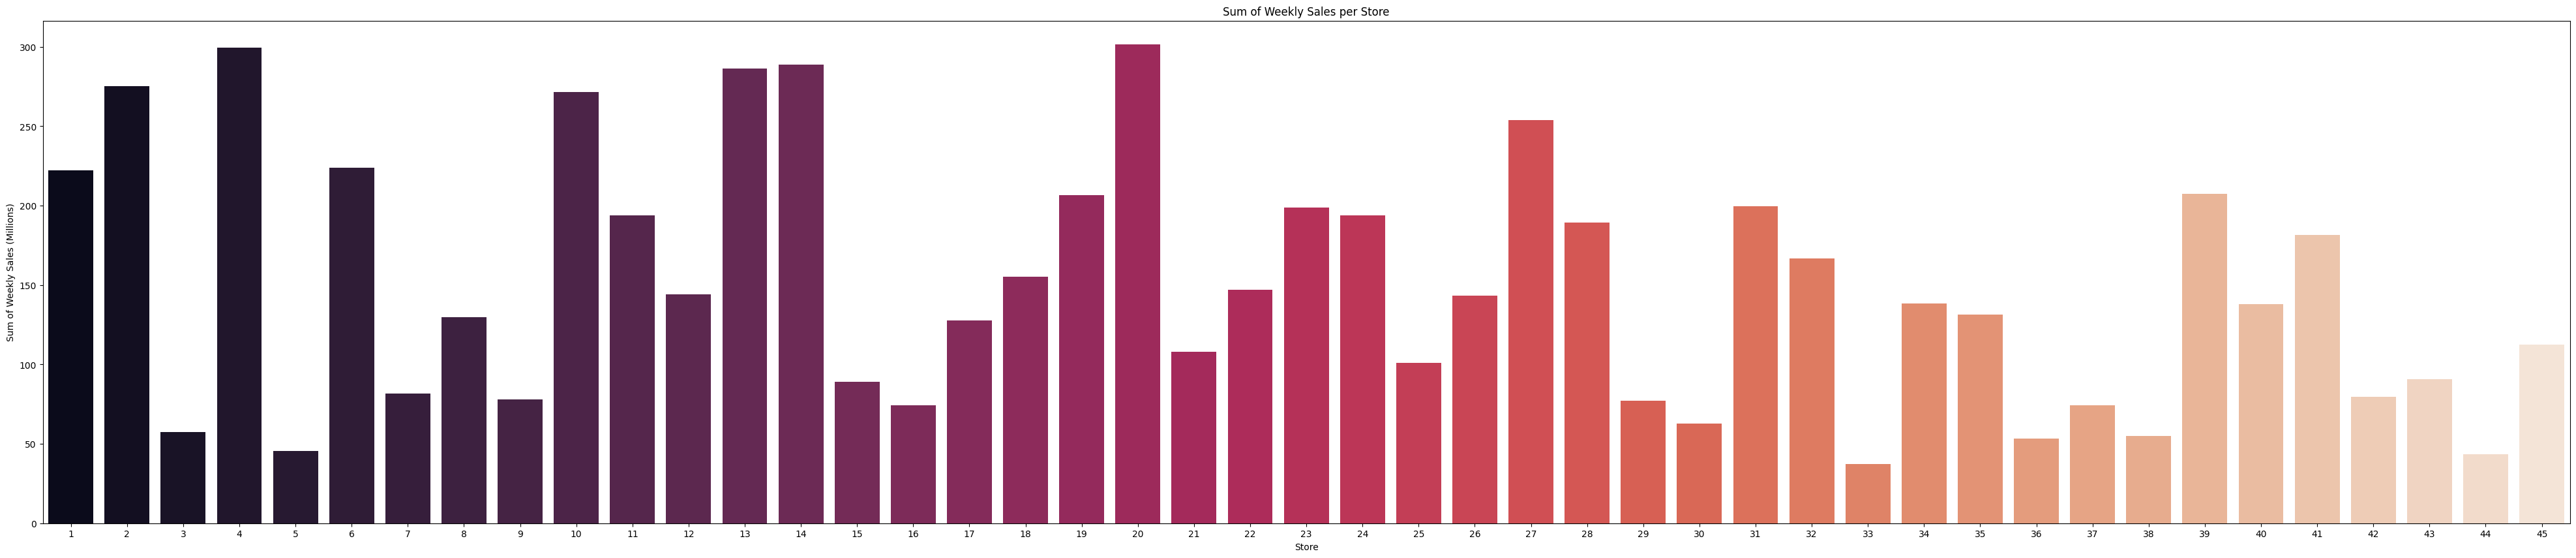

In [22]:
# Sum of weekly sales across Stores
stores_sales = df_new.groupby(by = ['Store'], as_index= False)['Weekly_Sales'].sum()
stores_sales['Weekly_Sales'] = stores_sales['Weekly_Sales']/1000000
plt.figure(figsize= (50,10))
sns.barplot(x = stores_sales.Store, y = stores_sales.Weekly_Sales , data = stores_sales, palette = 'rocket')
plt.xlabel('Store')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Store')
plt.show()

# Stores 4, 14, 20 are the stores with the highest sales across time

Findings:
Store number 20 and 4 were identified as the top earners based on their weekly sales, while store number 44, 33, 3 and 5 emerged as the least profitable.

#### Qns 6. Which type of store have the highest earner

/tmp/ipython-input-23-1379819349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = type_sales.Type, y = type_sales.Weekly_Sales , data = type_sales, palette = 'rocket')


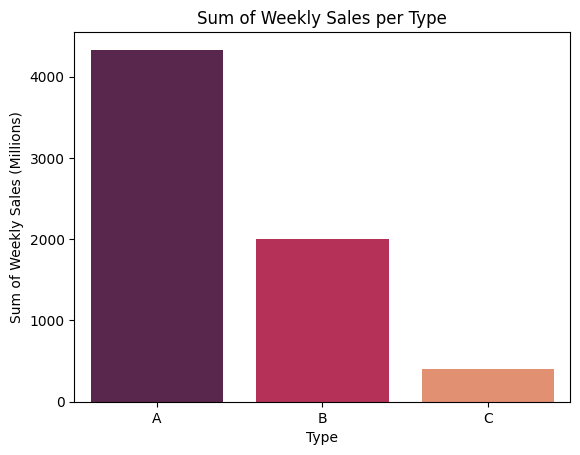

In [23]:
# Sum of weekly sales across Type
type_sales = df_new.groupby(by = ['Type'], as_index= False)['Weekly_Sales'].sum()
type_sales['Weekly_Sales'] = type_sales['Weekly_Sales']/1000000
sns.barplot(x = type_sales.Type, y = type_sales.Weekly_Sales , data = type_sales, palette = 'rocket')
plt.xlabel('Type')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Type')
plt.show()

# Type A has the highest sales

Findings:
Store type A, succeeded by store type B, were identified as the store types with the highest earnings, while store type C exhibited the lowest weekly sales.

**Store Characteristics and Sales:**
* Store Types A and B experience a slight yearly sales decrease of around 5% despite higher store counts.
* Store Type C maintains consistent sales and shows a slight yearly increase of about 3% in sales.

#### Qns 7. Which departments have the highest earner?

/tmp/ipython-input-24-458359894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales, palette ='rocket')


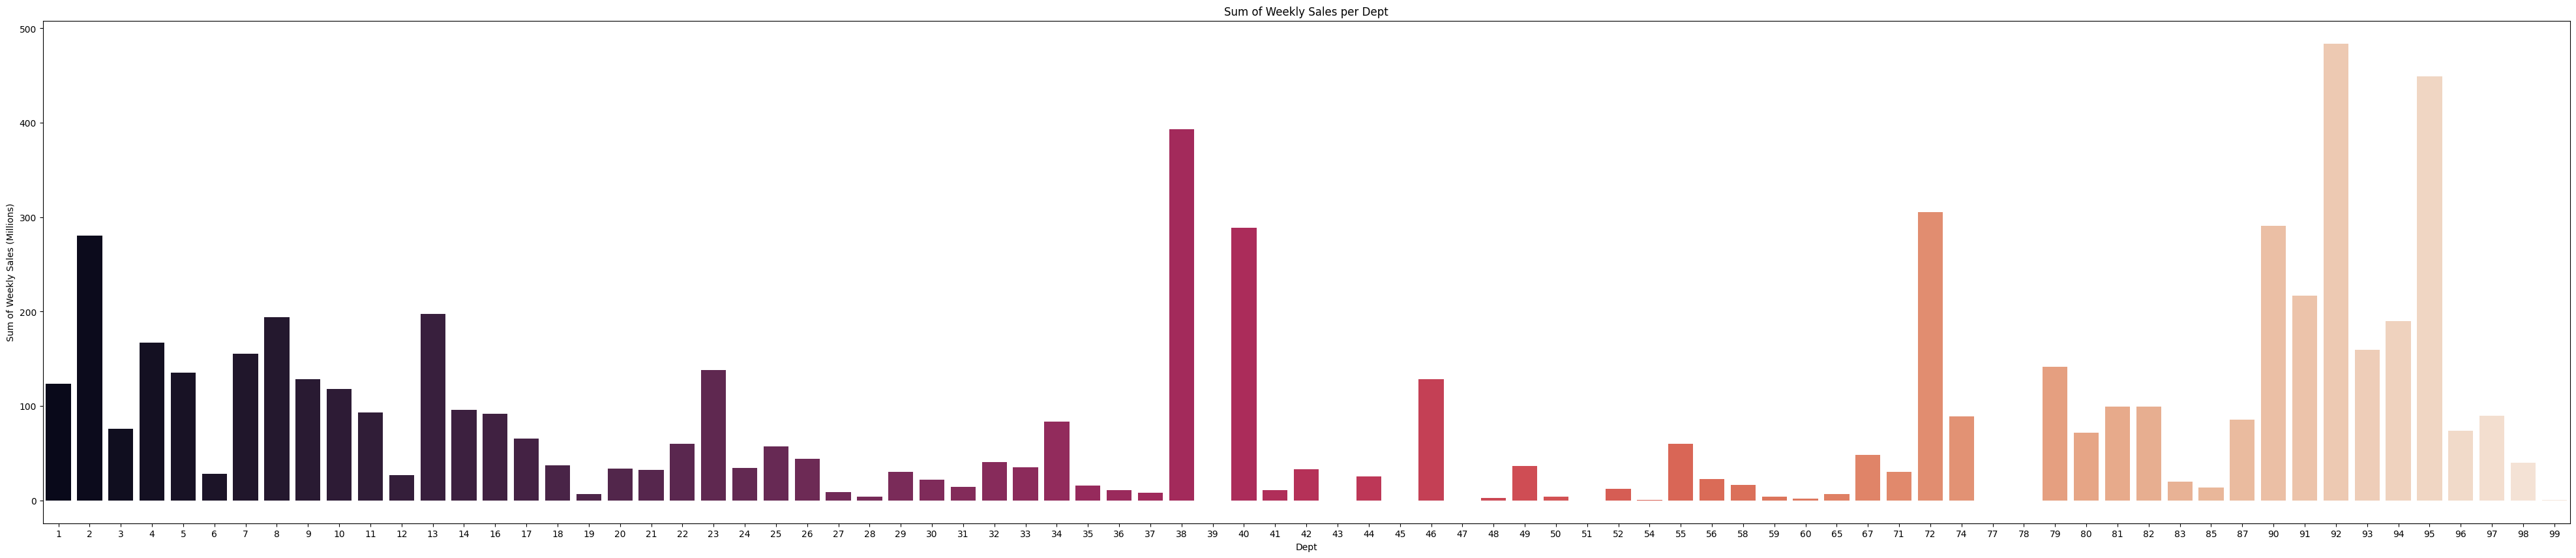

In [24]:
# Sum of weekly sales across Department
dept_sales = df_new.groupby(by = ['Dept'], as_index= False)['Weekly_Sales'].sum()
dept_sales['Weekly_Sales'] = dept_sales['Weekly_Sales']/1000000
plt.figure(figsize=(50,10))
sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales, palette ='rocket')
plt.xlabel('Dept')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Dept')
plt.show()

# dept 38, 92,95 have the highest sales

Findings:

Certain departments (1-15, 38, 40, 72, and 90-95) demonstrate notably higher weekly sales, with an average increase of 25%.

#### Qns 8: Trend of markdown across time

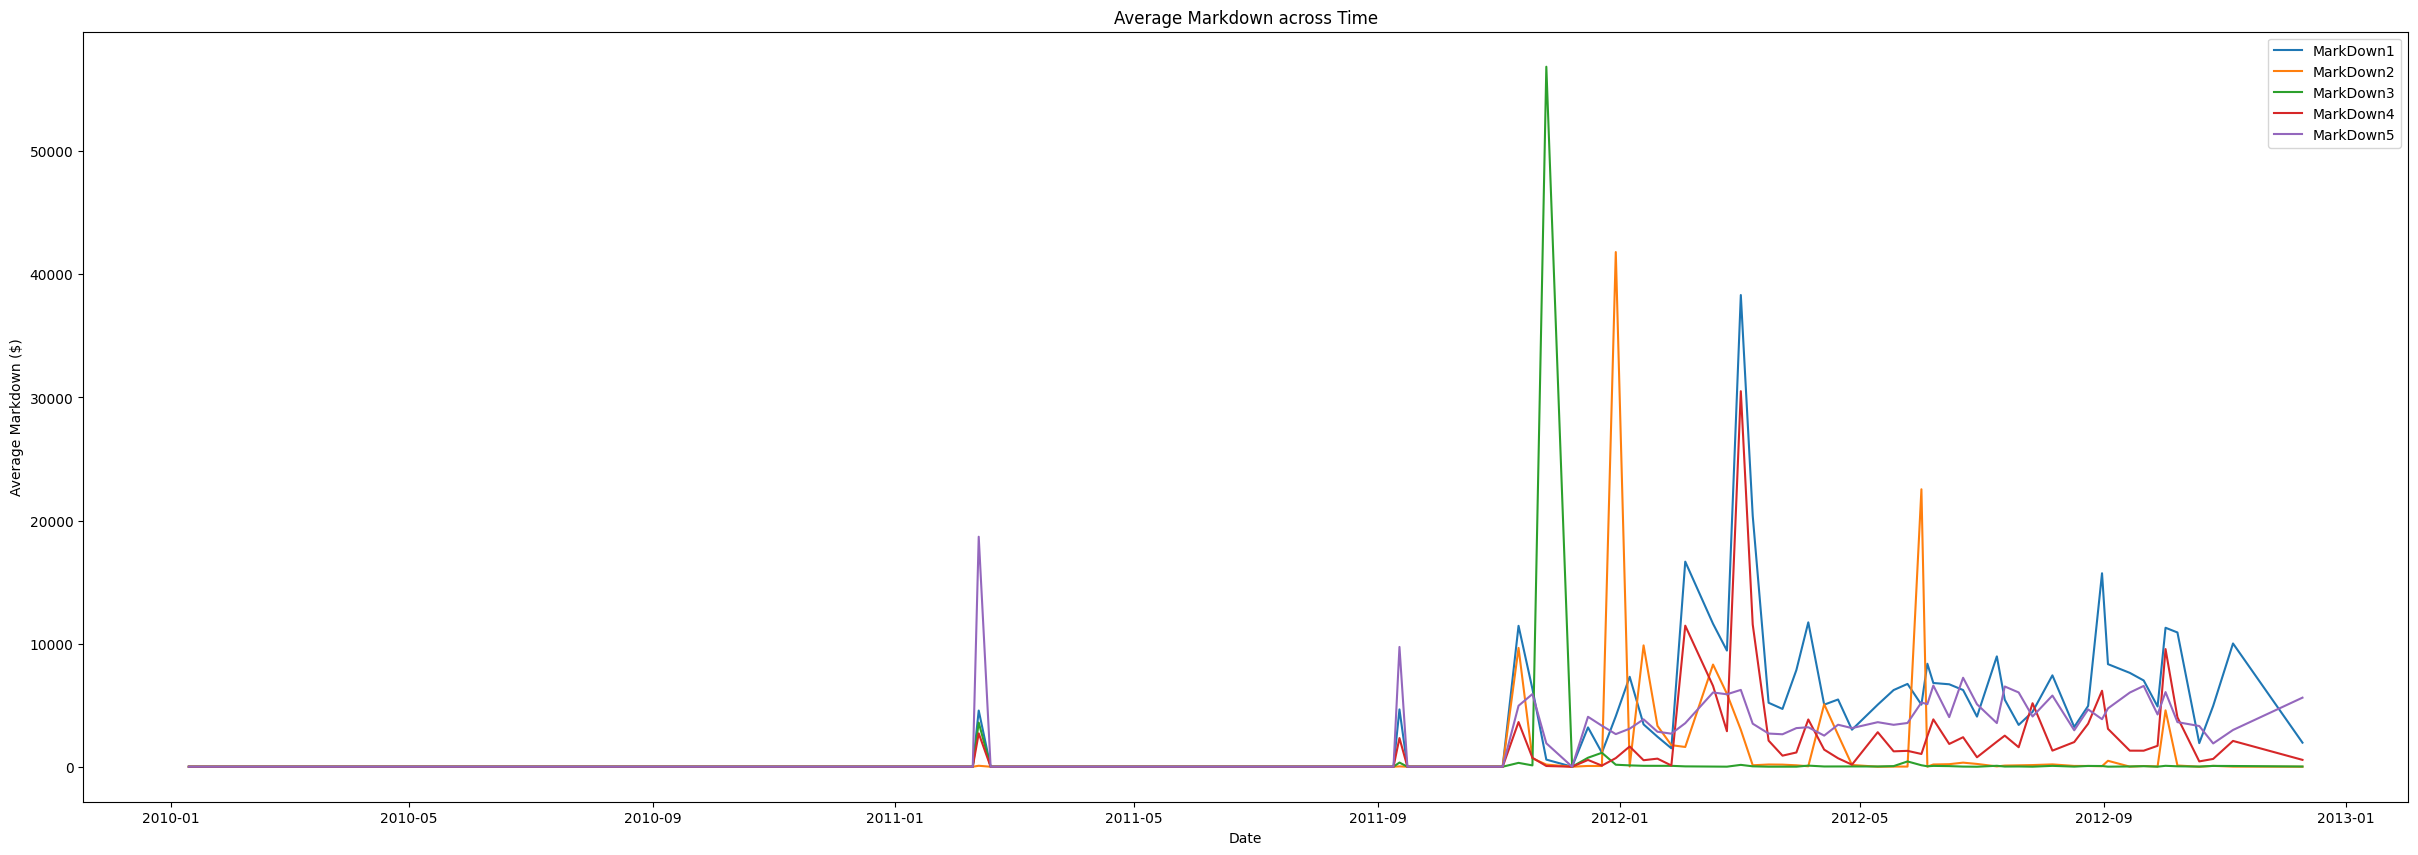

In [25]:
# Average Markdown across time
df_markdown = df_new.groupby('Date').agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
plt.figure(figsize = (30,10))

plt.plot(df_markdown.index, df_markdown.MarkDown1, label = 'MarkDown1')
plt.plot(df_markdown.index, df_markdown.MarkDown2, label = 'MarkDown2')
plt.plot(df_markdown.index, df_markdown.MarkDown3, label = 'MarkDown3')
plt.plot(df_markdown.index, df_markdown.MarkDown4, label = 'MarkDown4')
plt.plot(df_markdown.index, df_markdown.MarkDown5, label = 'MarkDown5')


plt.xlabel("Date")
plt.ylabel("Average Markdown ($)")
plt.title("Average Markdown across Time")
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Average Markdown per Month')

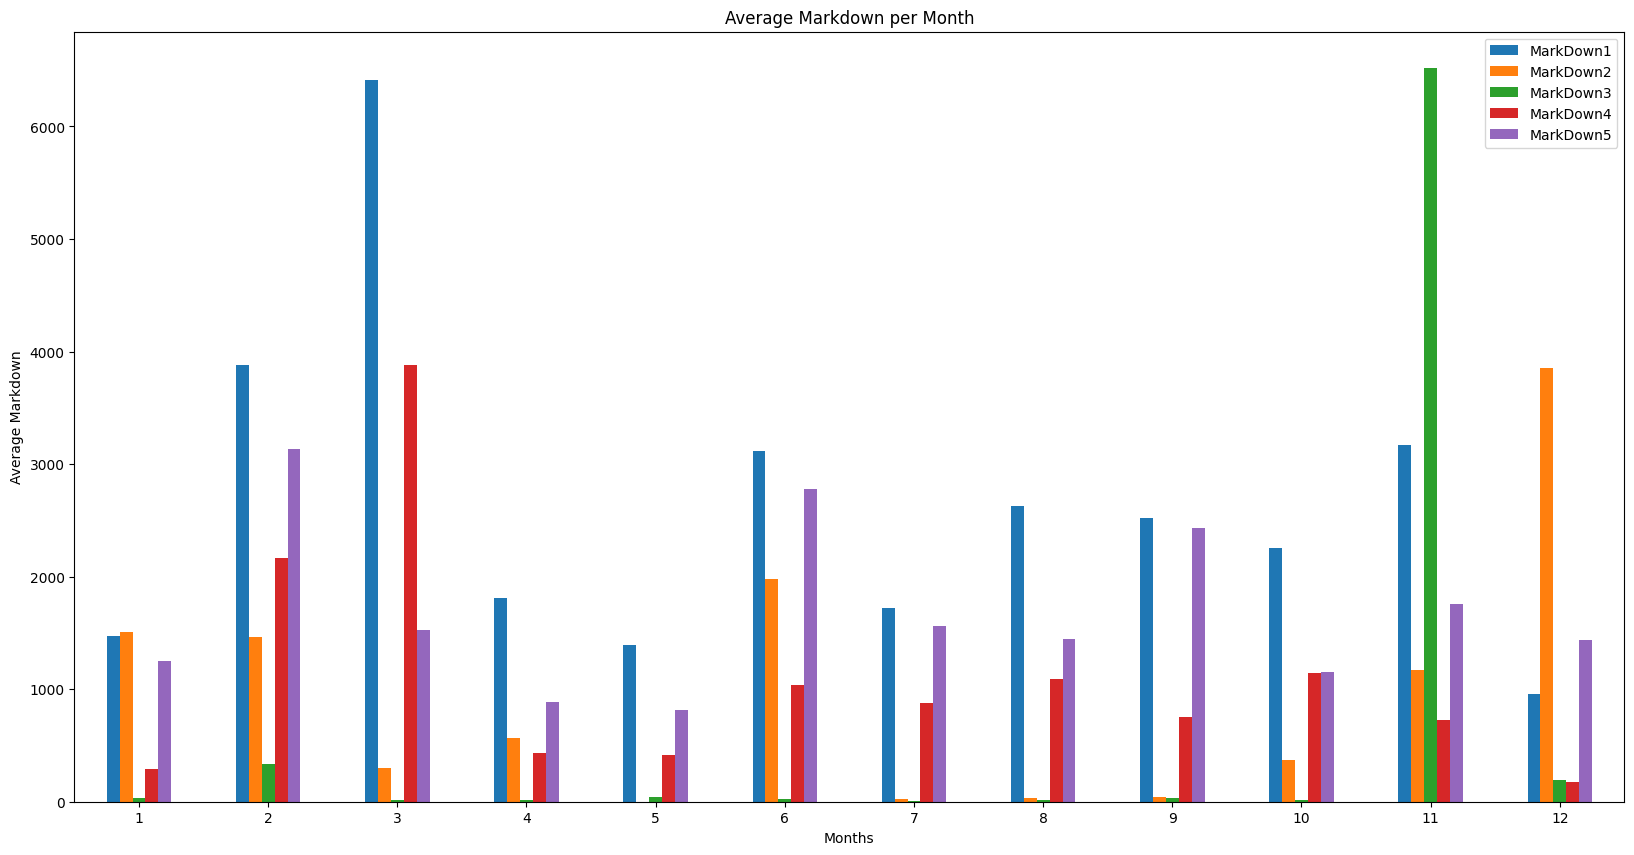

In [26]:
# Markdown across months
df_markdown_month = df_new.groupby(df_new.Date.dt.month).agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
df_markdown_month.head()
df_markdown_month.plot(kind = 'bar', figsize = (20,10), rot = 0)
plt.xlabel("Months")
plt.ylabel('Average Markdown')
plt.title('Average Markdown per Month')

# Markdown3 is the highest in November and markdown 1 is highest in March

#### Qns 9: Trend of markdown across types

Text(0.5, 1.0, 'Average Markdown per Type')

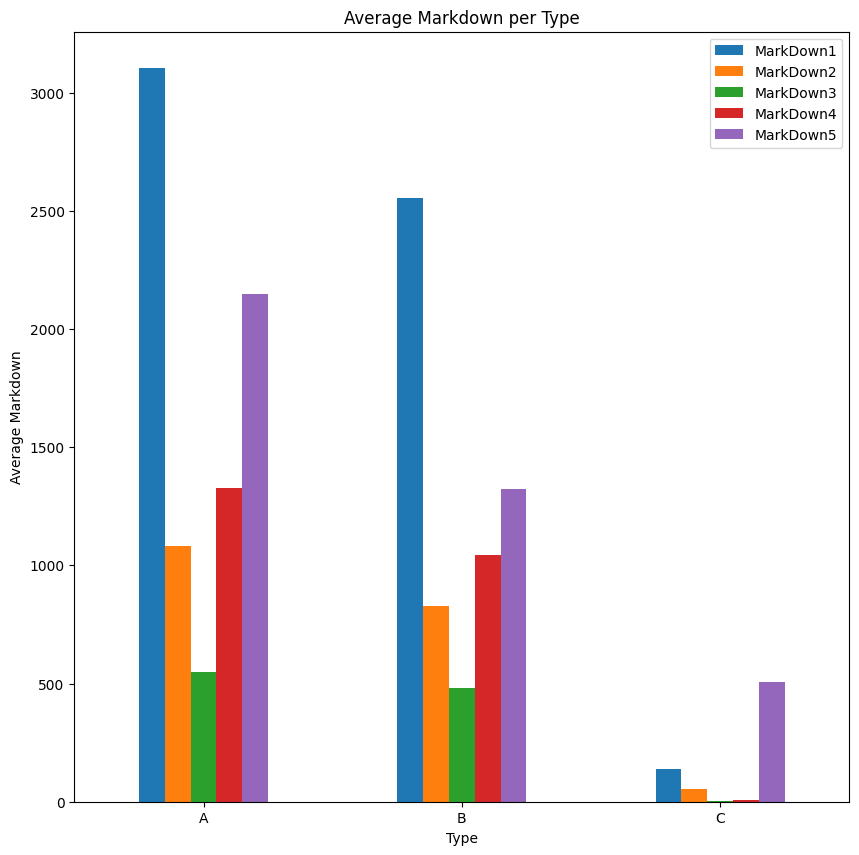

In [27]:
# Markdown across Type
# Markdown across months
df_markdown_type = df_new.groupby(df_new.Type).agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
df_markdown_type.head()
df_markdown_type.plot(kind = 'bar', figsize = (10,10), rot = 0)
plt.xlabel("Type")
plt.ylabel('Average Markdown')
plt.title('Average Markdown per Type')

# Markdown1 is the highest for Type A, B while markdown 5 is the highest for type C

#### Qns 10:Correlation of factors and weekly sales

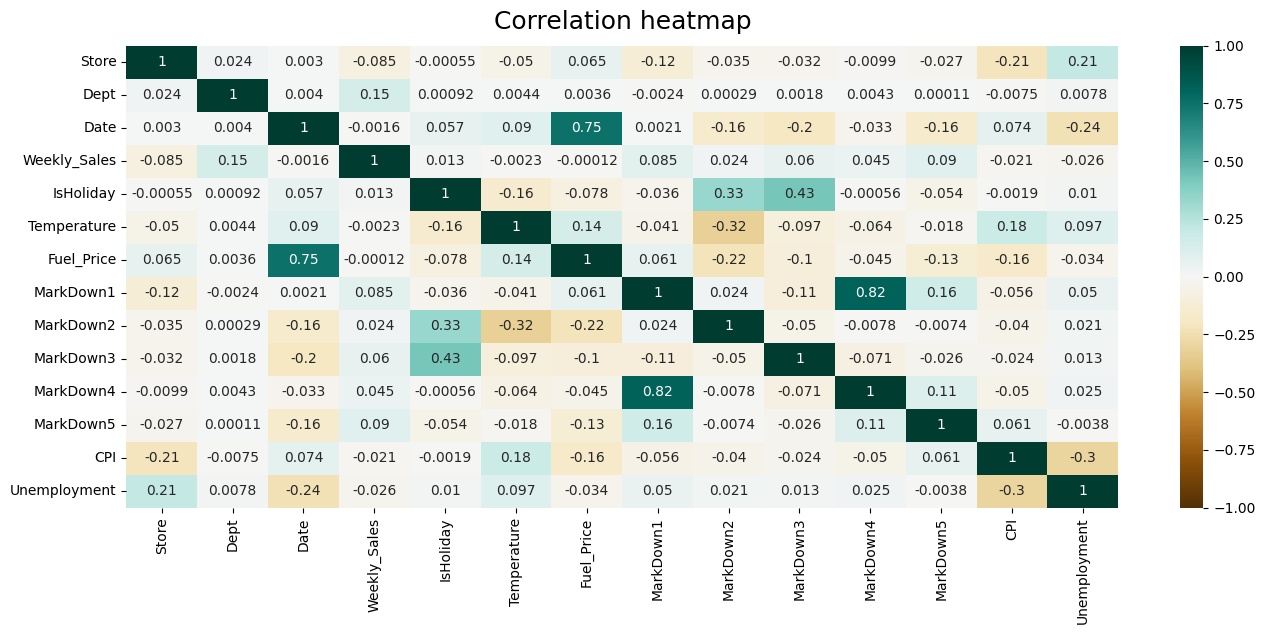

In [28]:
plt.figure(figsize = (16,6))
df_new = pd.DataFrame(df_new)
df_new = df.astype(float, errors = 'ignore')
heatmap = sns.heatmap(df_new.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation heatmap', fontdict = {'fontsize':18}, pad=12);

**Findings**
* Weekly sales do not exhibit a strong correlation with other parameters.
* Consumer Price Index (CPI) and Unemployment display a negative correlation.
* Unemployment and Fuel Price are also negatively correlated.

* **November-December Sales Trend:** There's a noticeable spike in weekly sales during November and December; however, overall sales haven't shown a consistent increase throughout the year.
* **Holiday Sales Peaks:** Sales figures experience significant peaks during weeks close to holidays.
* **Fuel and Consumer Price Index:** Both fuel prices and the Consumer Price Index have shown a steady increase over the course of the year.
* **Unemployment Trend:** The unemployment rate has steadily decreased each year.
* **Temperature Pattern:** Temperature data exhibits a random walk, indicating no clear pattern or trend over time.

In conclusion, understanding the dynamics of sales patterns, store types, and departmental performance is essential for effective business strategies. The data provides valuable insights for optimizing sales approaches, managing inventory, and tailoring marketing efforts to maximize revenue and enhance customer satisfaction.